# Building Bar Charts with Interactive Gradient Scales
_**From Applied Plotting, Charting & Data Representation in Python course ([Coursera.org](https://www.coursera.org/learn/python-plotting?specialization=data-science-python))**_
 
*In Nivan Ferreira's [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf), he describes the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts). [[1]](#ref)*

<br>
<img src="figures/Assignment3Fig1.png" alt="Figure 1" style="width: 300px;"/>
<h4 style="text-align: center;" markdown="1">&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 (from Ferreira et al, 2014)</h4>
<br>

*A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value. [[1]](#ref)*

<br>
<img src="figures/Assignment3Fig2c.png" alt="Figure 2" style="width: 300px;"/>
<h4 style="text-align: center;" markdown="1">Figure 2c (from Ferreira et al. 2014)<br>
Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>
<br>
<br>

**Task:**
<br>
Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis). Additionally, include interactivity which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

<a id='ref'></a>
**References:** 
<br> 
[1] Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))

<IPython.core.display.Javascript object>


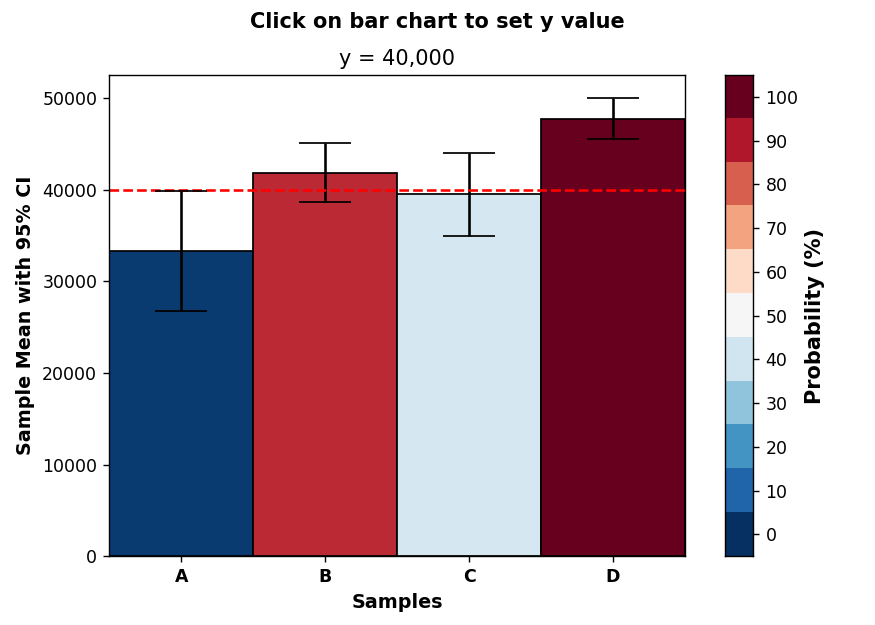

In [1]:
%matplotlib notebook

from matplotlib.ticker import FormatStrFormatter
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats as st
import pandas as pd
import numpy as np


def get_barcolors(y):
    sem = std0/np.sqrt(count0)
    prob = st.norm.cdf((len(df.T.columns)*([y]) - mean0)/sem)
    return cm.RdBu(prob)
   

def draw_plot(line_y = 40000):
    
    # Color Gradient Scale
    mat = np.array([np.arange(1, 12)])
    implt = plt.subplot(gspect[:, 18:19])
    implt.imshow(mat.T, cmap=cm.RdBu, aspect='auto', interpolation='nearest')
    implt.set_xticks([])
    implt.set_yticks(np.arange(0, 11))
    implt.set_yticklabels(np.flip(np.arange(0, 110, step=10)))
    implt.set_ylabel('Probability (%)', fontsize=12, weight='bold')
    implt.yaxis.tick_right()
    implt.yaxis.set_label_position('right')

    # Bar Chart
    main_plt = plt.subplot(gspect[:, :17])
    bars = main_plt.bar(range(0, 4), mean0, width=1, yerr=yerr0, capsize=15, color=get_barcolors(line_y))
    for bar in bars:
        bar.set_edgecolor('black')
    xmin = -0.5
    xmax = 3.5
    main_plt.set_title('y = {:,.0f}'.format(line_y))
    main_plt.set_xlim(xmin, xmax)
    main_plt.set_xticks([0, 1, 2, 3])
    main_plt.set_xticklabels(df.T.columns.values, weight='bold')
    main_plt.set_ylabel('Sample Mean with 95% CI', fontsize=11, weight='bold')
    main_plt.set_xlabel('Samples', fontsize=11, weight='bold')
    main_plt.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    
    # Horizontal Line
    line = main_plt.hlines(line_y, xmin, xmax, color='red', linestyle='dashed')
    
    plt.show()
    

def onclick(event):
    plt.cla()
    draw_plot(event.ydata)

    
# Create DataFrame with Random Variables  
np.random.seed(12345)
df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=['A','B','C','D'])

# Calculate Statistical Variables Needed
mean0 = df.T.mean()
std0 = df.T.std()
count0 = df.T.count()
yerr0 = 1.96*std0/np.sqrt(count0)

# Plot Chart
plt.figure(figsize=(7, 5))
plt.suptitle('Click on bar chart to set y value', fontsize=12, weight='bold')
gspect = gridspec.GridSpec(15, 20)
draw_plot()
plt.gcf().canvas.mpl_connect('button_press_event', onclick);